In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CarpriceData=pd.read_csv('CarPricesData.csv')

In [3]:
CarpriceData.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [4]:
CarpriceData.shape

(1436, 10)

In [6]:
CarpriceData.duplicated().sum()

1

In [7]:
print('Shape before deleting duplicate values:', CarpriceData.shape)
# Removing duplicate rows if any
CarpriceData=CarpriceData.drop_duplicates()
print('Shape After deleting duplicate values:', CarpriceData.shape)

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


In [8]:
print(CarpriceData.describe(include='all'))
print("-"*70)
print(CarpriceData.info())
print("-"*70)
print(CarpriceData.nunique())

               Price          Age             KM FuelType           HP  \
count    1435.000000  1433.000000    1435.000000     1431  1435.000000   
unique           NaN          NaN            NaN        3          NaN   
top              NaN          NaN            NaN   Petrol          NaN   
freq             NaN          NaN            NaN     1260          NaN   
mean    10720.915679    56.020237   68571.782578      NaN   101.491986   
std      3608.732978    18.544948   37491.094553      NaN    14.981408   
min      4350.000000     1.000000       1.000000      NaN    69.000000   
25%      8450.000000    44.000000   43000.000000      NaN    90.000000   
50%      9900.000000    61.000000   63451.000000      NaN   110.000000   
75%     11950.000000    70.000000   87041.500000      NaN   110.000000   
max     32500.000000    80.000000  243000.000000      NaN   192.000000   

           MetColor    Automatic           CC        Doors       Weight  
count   1435.000000  1435.000000  143

# Histogram for Quantitative Variables

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'KM'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

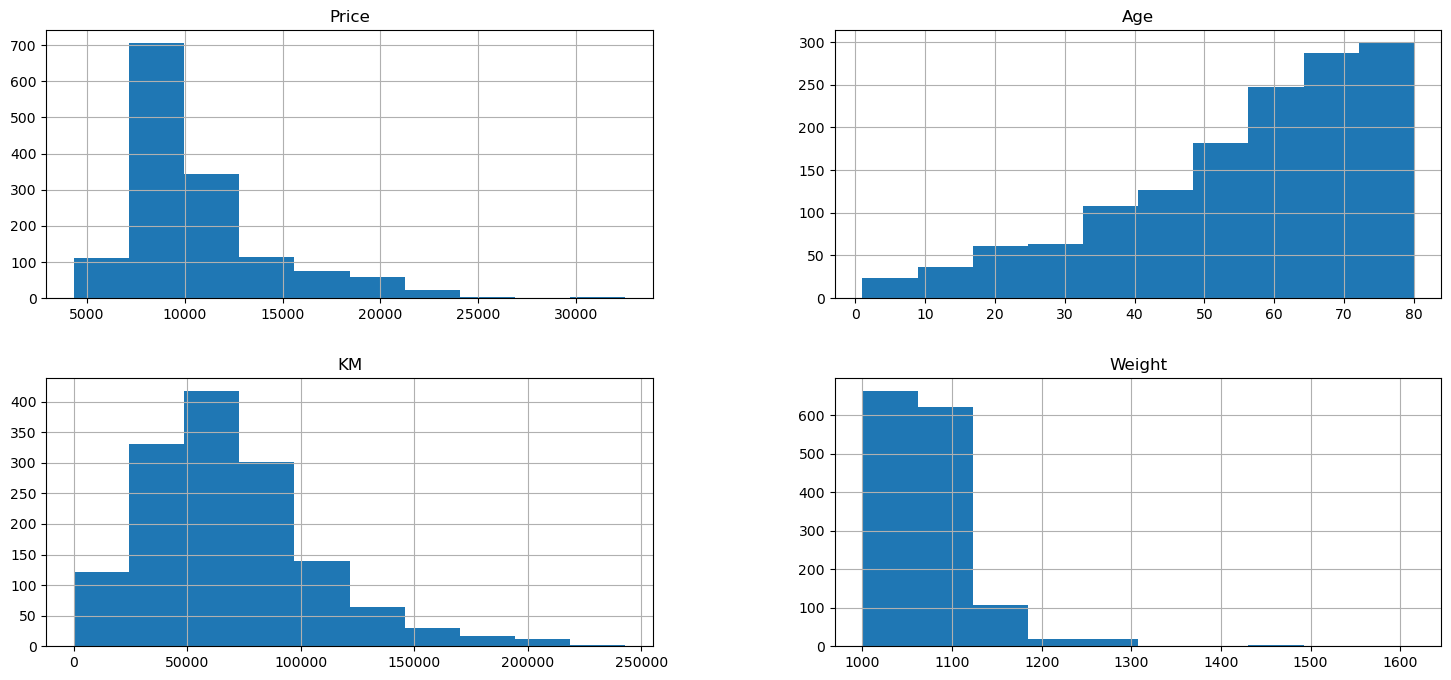

In [9]:
CarpriceData.hist(['Price','Age','KM','Weight'],figsize=(18,8))

# Treating Outliers
* There are two Quantitative columns where the outlier is present
* one Weight and another is price

In [11]:
# the number of rows for outliers for weight column
len(CarpriceData[CarpriceData['Weight']>1400])

5

In [14]:
# the number of rows for outliers for price column
len(CarpriceData['Price'][CarpriceData['Price']>25000])

3

In [12]:
# Nearest Value for Outlier
CarpriceData['Weight'][CarpriceData['Weight']<1400].sort_values(ascending=False)

112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
927     1000.0
1410    1000.0
605     1000.0
1021    1000.0
957     1000.0
Name: Weight, Length: 1428, dtype: float64

In [13]:
# Replacing outliers with nearest logical value
CarpriceData['Weight'][CarpriceData['Weight']>1400]=1320

In [16]:
# the number of rows for outliers for price column
len(CarpriceData['Price'][CarpriceData['Price']>25000])

3

In [18]:
# Nearest Value for Outlier
CarpriceData['Price'][CarpriceData['Price']<25000].sort_values(ascending=False)

115     24990
112     24950
147     24500
141     23950
171     23750
        ...  
402      5150
192      4750
393      4450
1048     4400
191      4350
Name: Price, Length: 1432, dtype: int64

In [19]:
# Replacing outliers with nearest logical value
CarpriceData['Price'][CarpriceData['Price']>25000]=24990

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

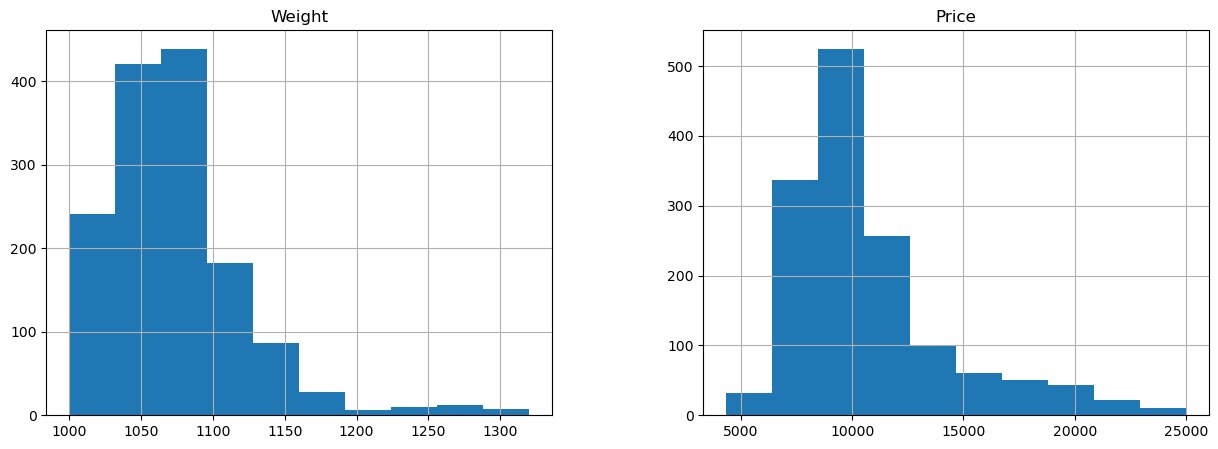

In [21]:
# Histogram for weight after outlier treatment
CarpriceData[['Weight', 'Price']].hist(figsize=(15,5))

# Missing Value Treatment

In [22]:
# Checking missing values
CarpriceData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

## Finding Columns where Missing values is Present 

In [26]:
CarpriceData[CarpriceData['Age'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
38,15750,NaN,25329,Petrol,97,1,0,1400.0,3,1100.0
73,15750,NaN,28227,Petrol,97,1,0,1400.0,5,1110.0


In [25]:
CarpriceData[CarpriceData['FuelType'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
14,22500,32.0,34131,NaN,192,1,0,1800.0,3,1185.0
474,10450,48.0,64193,NaN,110,1,0,1600.0,3,1040.0
686,8950,65.0,100550,NaN,110,1,0,1600.0,5,1075.0
1423,7950,80.0,35821,NaN,86,0,1,1300.0,3,1015.0


In [27]:
CarpriceData[CarpriceData['CC'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1392,7500,79.0,49827,Petrol,86,1,0,NaN,5,1035.0
1401,8950,71.0,47633,Petrol,110,1,0,NaN,5,1075.0


In [28]:
CarpriceData[CarpriceData['Weight'].isnull()]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1396,9800,77.0,48838,Petrol,110,0,0,1600.0,3,NaN
1408,9250,80.0,44444,Petrol,110,1,0,1600.0,3,NaN


I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [34]:
# Treating missing values of continuous variable with Median value
CarpriceData['Weight'].fillna(value=CarpriceData['Weight'].median(), inplace=True)
CarpriceData['Age'].fillna(value=CarpriceData['Age'].median(), inplace=True)

In [35]:
# Treating missing values of categorical variable with MODE value
CarpriceData['FuelType'].fillna(value=CarpriceData['FuelType'].mode()[0], inplace=True)
CarpriceData['CC'].fillna(value=CarpriceData['CC'].mode()[0], inplace=True)

In [37]:
# Checking missing values again after the treatment
CarpriceData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

# Ploting Bar Chart for Categorical Variables 

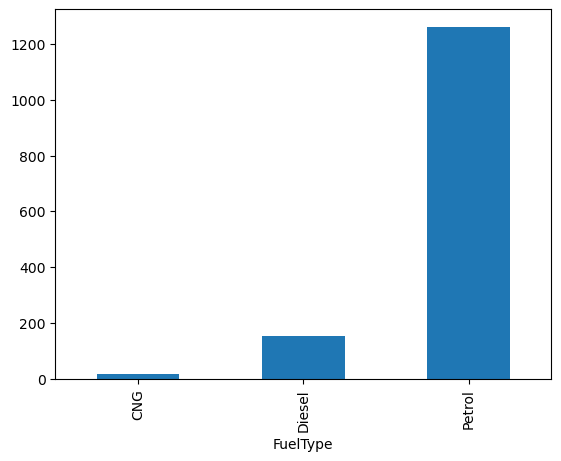

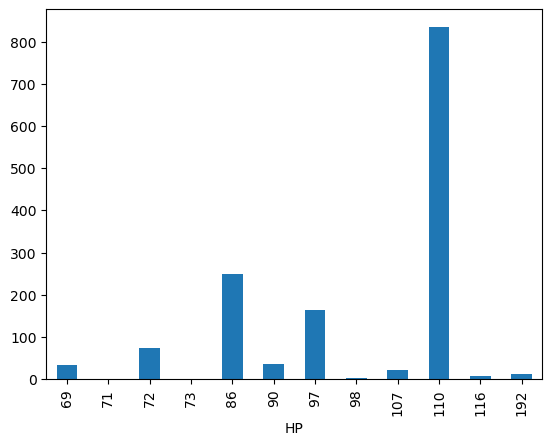

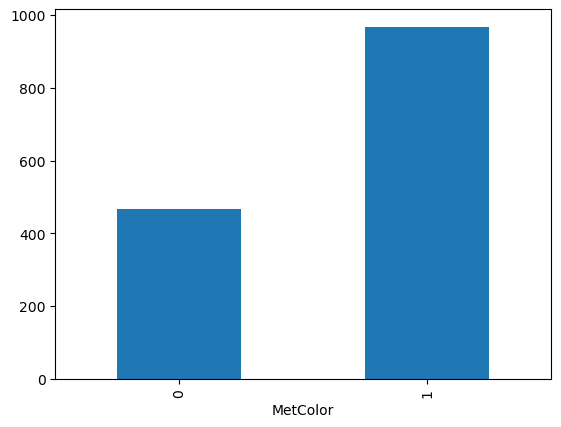

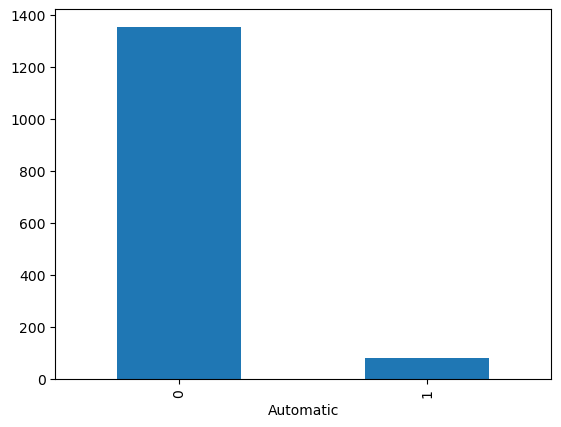

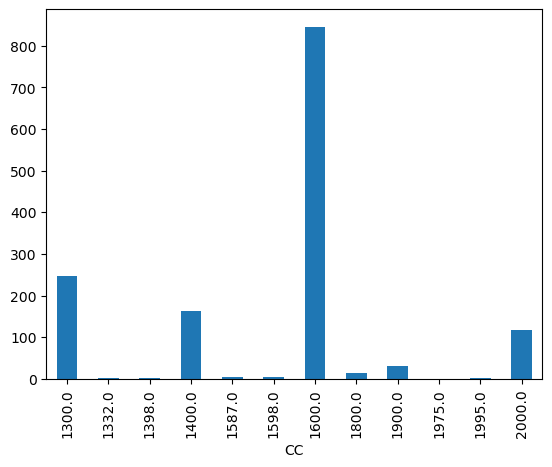

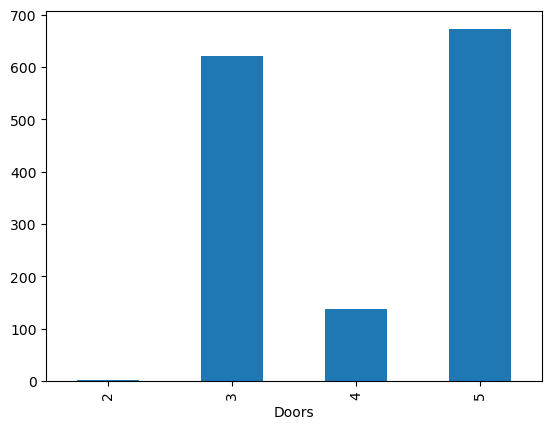

In [11]:
Categoricallist=['FuelType','HP','MetColor','Automatic','CC','Doors']
for i in Categoricallist:
    CarpriceData.groupby(i).size().plot(kind='bar')
    plt.show()

# Feature Selection (Bi-Variate analysis)

<AxesSubplot:xlabel='Weight', ylabel='Price'>

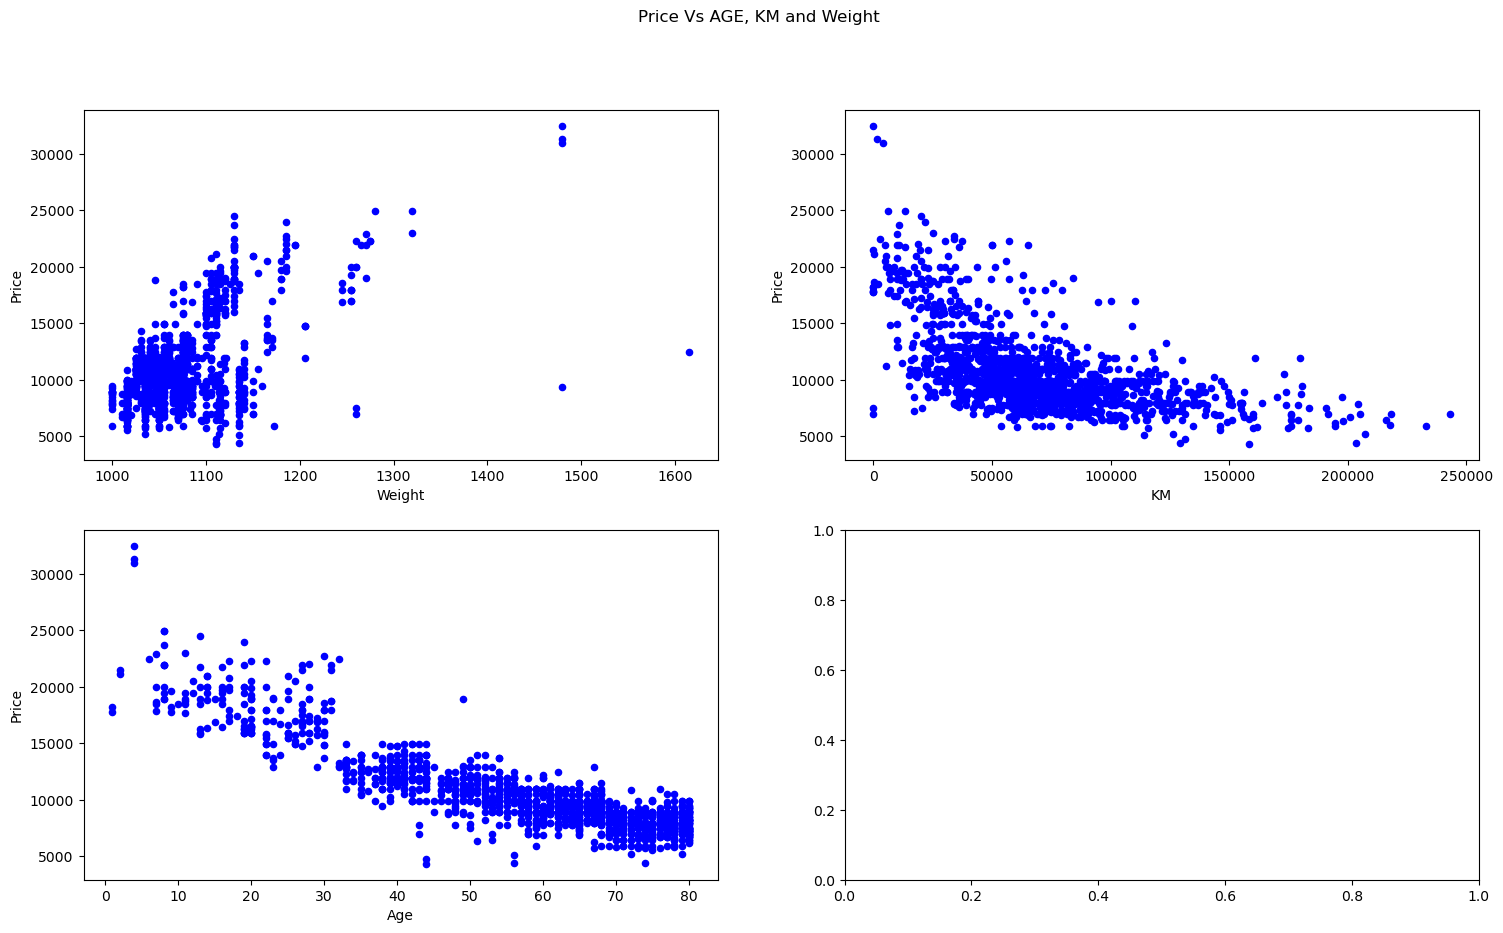

In [12]:
# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=2, ncols=2, figsize=(18,10))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts
CarpriceData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[1,0])
CarpriceData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[0,1])
CarpriceData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[0,0])

In [14]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=CarpriceData[ContinuousCols].corr()
CorrelationData['Price']

Price     1.000000
Age      -0.875951
KM       -0.569420
Weight    0.575794
Name: Price, dtype: float64

<b>Final selected Continuous columns:</b>

'Age','KM','Weight'

# Relationship exploration: Categorical Vs Continuous -- Box Plots

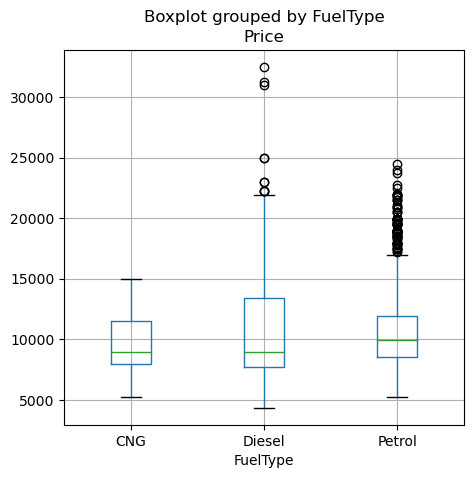

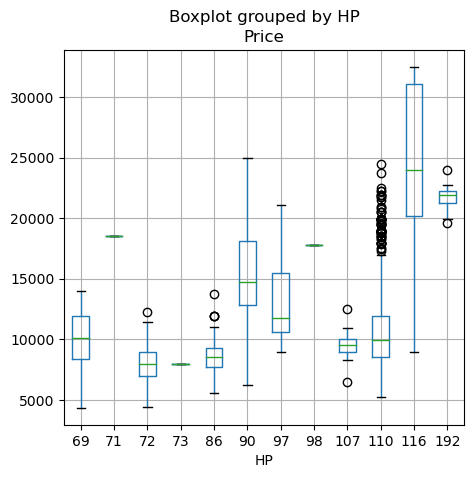

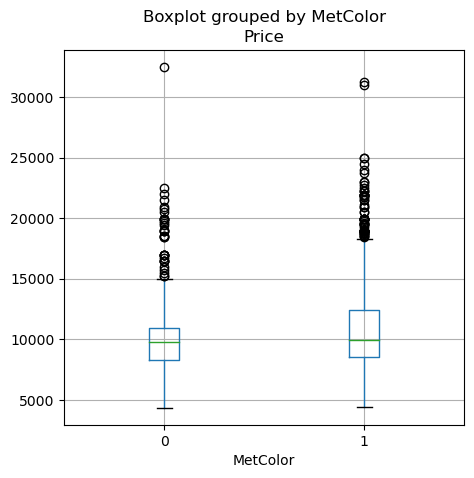

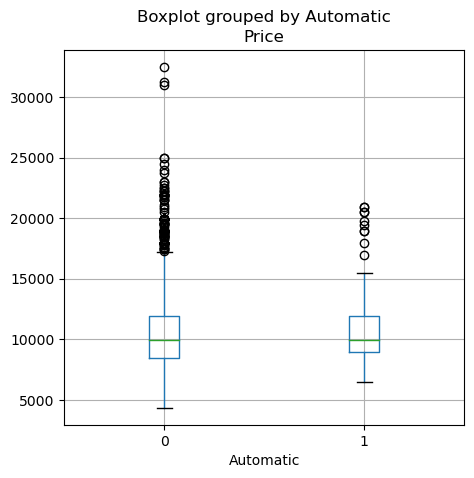

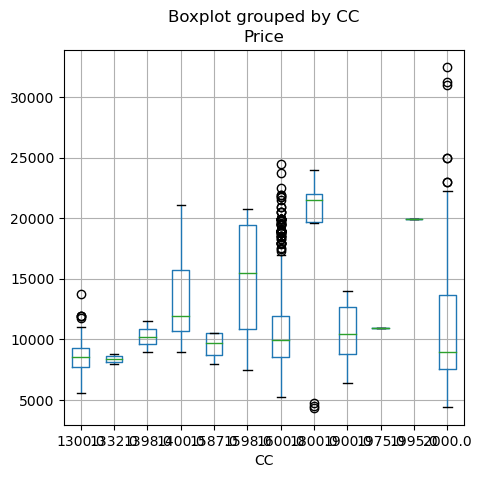

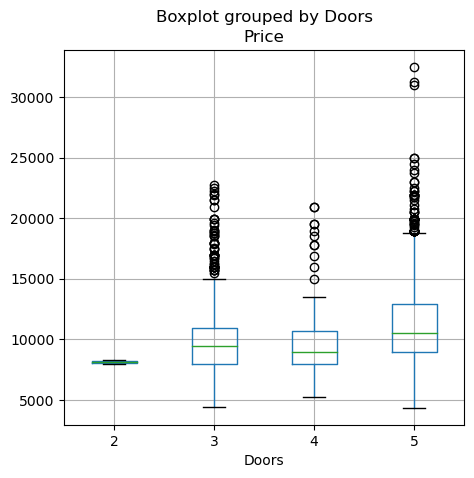

In [15]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']

# Creating box plots for each continuous predictor against the Target Variable "Price"
for i in CategoricalColsList:
    CarpriceData.boxplot(column='Price', by=i, figsize=(5,5))
    plt.show()

In [16]:
CategoryGroupLists=CarpriceData.groupby('FuelType')['Price'].apply(list)
CategoryGroupLists

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22000, 227...
Name: Price, dtype: object

In [38]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [39]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarpriceData, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-Value: 0.13509668858708382
HP is correlated with Price | P-Value: 1.9274014078136855e-103
MetColor is correlated with Price | P-Value: 2.9082820205816128e-05
Automatic is NOT correlated with Price | P-Value: 0.17860614078485976
CC is correlated with Price | P-Value: 4.667580175740994e-49
Doors is correlated with Price | P-Value: 1.0200265373934503e-12


['HP', 'MetColor', 'CC', 'Doors']

<b>Final selected Categorical columns:</b>

'HP', 'MetColor', 'CC', 'Doors'

In [40]:
import os
os.getcwd()

'D:\\ML Projects\\Spervised ML\\Regression\\Carprice Project'

In [41]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

# Selecting final columns
DataForML=CarpriceData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [42]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [43]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


## Converting the nominal variable to numeric using get_dummies()

In [49]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric.head(10)

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3
5,32.0,61000,1170.0,90,0,2000.0,3
6,27.0,94612,1245.0,90,1,2000.0,3
7,30.0,75889,1245.0,90,1,2000.0,3
8,27.0,19700,1185.0,192,0,1800.0,3
9,23.0,71138,1105.0,69,0,1900.0,3


In [51]:
# Adding Target Variable to the data
DataForML_Numeric['Price']=CarpriceData['Price']
DataForML_Numeric.head(10)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
5,32.0,61000,1170.0,90,0,2000.0,3,12950
6,27.0,94612,1245.0,90,1,2000.0,3,16900
7,30.0,75889,1245.0,90,1,2000.0,3,18600
8,27.0,19700,1185.0,192,0,1800.0,3,21500
9,23.0,71138,1105.0,69,0,1900.0,3,12950


# Machine Learning: Splitting the data into Training and Testing sample

In [59]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']


x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22) # random_state="Seed value"

# Quick check on the shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1148, 7)
(1148,)
(287, 7)
(287,)


In [60]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[   26., 32692.,  1100.,    97.,     1.,  1400.,     3.],
       [   66., 63881.,  1015.,    86.,     0.,  1300.,     3.],
       [   75., 52000.,  1075.,   110.,     0.,  1600.,     5.],
       [   11., 24500.,  1120.,   110.,     1.,  1600.,     3.],
       [   66., 45000.,  1035.,    86.,     1.,  1300.,     5.],
       [   56., 43700.,  1025.,    86.,     1.,  1300.,     3.],
       [   55., 94122.,  1015.,    86.,     1.,  1300.,     3.],
       [   62., 80265.,  1015.,    86.,     0.,  1300.,     3.],
       [   51., 96135.,  1115.,    72.,     0.,  2000.,     3.],
       [   62., 59295.,  1035.,    86.,     0.,  1300.,     5.]])

In [61]:
y_train[0:10]

array([14950,  9500,  8750, 18750,  7950, 10750,  8950,  8750,  9950,
        9500], dtype=int64)

# Multiple Linear Regression

In [62]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8674488629786414

##### Model Validation and Accuracy Calculations ##########
    Age       KM  Weight     HP  MetColor      CC  Doors  Price  \
0  80.0  58000.0  1055.0  110.0       0.0  1600.0    3.0   8950   
1  53.0  70239.0  1040.0  110.0       0.0  1600.0    3.0  10990   
2  67.0  70552.0  1075.0  110.0       0.0  1600.0    5.0   9900   
3  73.0  88186.0  1115.0   72.0       1.0  2000.0    3.0   6950   
4  54.0  39291.0  1040.0  110.0       1.0  1600.0    3.0  10950   

   PredictedPrice  
0          7877.0  
1         10501.0  
2          9551.0  
3          7463.0  
4         10882.0  
   Price  PredictedPrice        APE
0   8950          7877.0  11.988827
1  10990         10501.0   4.449500
2   9900          9551.0   3.525253
3   6950          7463.0   7.381295
4  10950         10882.0   0.621005
Mean Accuracy on test data: 90.85197304902027
Median Accuracy on test data: 92.65546218487395

Accuracy values for 10-fold Cross Validation:
 [85.061963

In [66]:
TestingDataResults['PriceAVG']=TestingDataResults['Price'].mean()
TestingDataResults.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE,PriceAVG
0,80.0,58000.0,1055.0,110.0,0.0,1600.0,3.0,8950,7877.0,11.988827,10892.940767
1,53.0,70239.0,1040.0,110.0,0.0,1600.0,3.0,10990,10501.0,4.449500,10892.940767
2,67.0,70552.0,1075.0,110.0,0.0,1600.0,5.0,9900,9551.0,3.525253,10892.940767
3,73.0,88186.0,1115.0,72.0,1.0,2000.0,3.0,6950,7463.0,7.381295,10892.940767
4,54.0,39291.0,1040.0,110.0,1.0,1600.0,3.0,10950,10882.0,0.621005,10892.940767


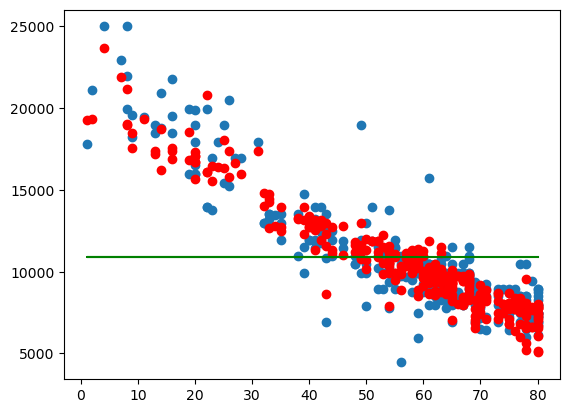

In [67]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Age'] , y=TestingDataResults['Price'])
plt.scatter(TestingDataResults['Age'] ,TestingDataResults['PredictedPrice'], color='red')
plt.plot(TestingDataResults['Age'] ,TestingDataResults['PriceAVG'], color='green')